## PageRank

In [2]:
import networkx as nx
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import random
import time

### Generate Random Directed Graph

In [2]:
import random
def geneDiGraph(numOfNodes):
    BA=nx.random_graphs.barabasi_albert_graph(numOfNodes,1)
    G=nx.DiGraph()
    for (x,y) in BA.edges():
        if random.random()<=0.5:
            G.add_edge(x,y)
        else:
            G.add_edge(y,x)
    return G

In [3]:
def geneP(G):
    A=np.array(nx.adjacency_matrix(G).todense())
    n=G.number_of_nodes()
    P=np.zeros([n,n])
    for i in range(n):
        total_links=np.sum(A[i])
        for j in range(n):
            if A[i][j]==1:
                P[i][j]=1.0/total_links
    return P.T

### Evaluation

In [9]:
def PageRank(numOfNodes):
    G=geneDiGraph(numOfNodes)
#     nx.draw(G)
#     plt.show()
    P=geneP(G)
    v=np.full(numOfNodes,1.0/numOfNodes)
    alpha=0.85
    
    pi=cp.Variable(numOfNodes)
    obj=cp.Minimize(cp.sum_squares((np.identity(numOfNodes)-alpha*P)@pi-(1-alpha)*v))
    constraints=[cp.sum(pi)==1,pi>=0]
    prob=cp.Problem(obj,constraints)
    prob.solve()
    return pi

#### 100 Pages

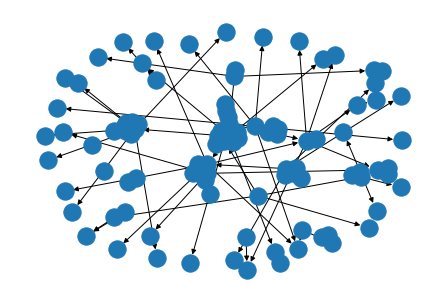

Task Over
Wall time: 434 ms


In [8]:
%%time
PageRank(100)
print('Task Over')

#### 1000 Pages

In [10]:
%%time
PageRank(1000)
print('Task Over')

Task Over
Wall time: 552 ms


#### 2000 Pages

In [11]:
%%time
PageRank(2000)
print('Task Over')

Task Over
Wall time: 2.21 s


#### 5000 Pages

In [12]:
%%time
PageRank(5000)
print('Task Over')

Task Over
Wall time: 13.3 s


#### 8000 Pages

In [13]:
%%time
PageRank(8000)
print('Task Over')

Task Over
Wall time: 34 s


#### 10000 Pages

In [14]:
%%time
PageRank(10000)
print('Task Over')

Task Over
Wall time: 52.9 s


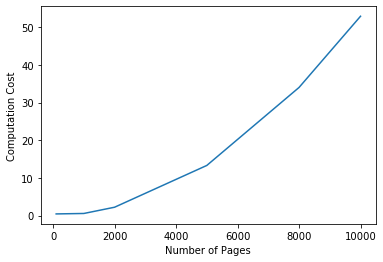

In [18]:
plt.plot([100,1000,2000,5000,8000,10000],[0.434,0.552,2.21,13.3,34,52.9])
plt.xlabel("Number of Pages")
plt.ylabel("Computation Cost")
plt.show()

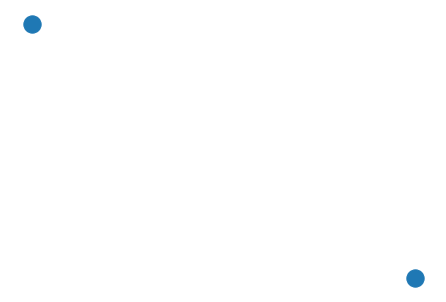

In [6]:
G=nx.DiGraph()
G.add_node('T')
G.add_node('S')
G.add_node('S')
nx.draw(G)
plt.show()

## Credibility in Social Network

### Generate Credibility Matrix

In [4]:
def geneA(numOfPeople):
    A=np.random.rand(numOfPeople,numOfPeople)
    for i in range(numOfPeople):
        for j in range((numOfPeople*3)//4):
            r=random.randint(0,numOfPeople-1)
            A[i][r]=0
    return A

### Calculate the Credibility of Each Person

In [5]:
def credibility(A,numOfPeople):
    c=cp.Variable(numOfPeople)
    I=np.identity(numOfPeople)
    obj=cp.Minimize(cp.sum_squares((I-A)@c))
    constraints=[cp.sum(c)==1,c>=0]
    prob=cp.Problem(obj,constraints)
    prob.solve()
    return c.value

### Evaluation

#### 100 People

In [6]:
A=geneA(100)

In [10]:
%%time
credibility(A,100)
print('Task Over')

Task Over
Wall time: 17 ms


#### 1000 People

In [11]:
A=geneA(1000)

In [14]:
%%time
credibility(A,1000)
print('Task Over')

Task Over
Wall time: 5.94 s


#### 2000 People

In [15]:
A=geneA(2000)

In [16]:
%%time
credibility(A,2000)
print('Task Over')

Task Over
Wall time: 32.6 s


#### 5000 People

In [17]:
A=geneA(5000)

In [18]:
%%time
credibility(A,5000)
print('Task Over')

Task Over
Wall time: 5min 7s


#### 8000 People

In [20]:
A=geneA(8000)

In [21]:
%%time
credibility(A,8000)
print('Task Over')

Task Over
Wall time: 20min 17s


#### 10000 People

In [24]:
A=geneA(10000)

In [25]:
%%time
credibility(A,10000)
print('Task Over')

Task Over
Wall time: 39min 35s


#### Graph of Computation Time

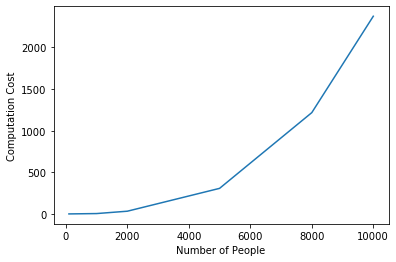

In [26]:
plt.plot([100,1000,2000,5000,8000,10000],[0.017,4.24,32.6,307,1217,2375])
plt.xlabel("Number of People")
plt.ylabel("Computation Cost")
plt.show()

## eSports Analysis

Team: Bilibili Gaming, Dominus Esports, EDward Gaming, FunPlus Phoenix, Invictus Gaming, JD Gaming, LGD Gaming, LNG Gaming, Oh My God, Rogue Warriors, Royal Never Give up, Suning, Team WE, Top Esports, Vici Gaming, Victory Five and EStar

### Load the Matrix

In [29]:
import pickle
f=open("B.pickle","r")
B=pickle.load(f)
f.close()
f=open("V.pickle","r")
V=pickle.load(f)
f.close()

### Calculate the Rating

In [38]:
%%time

print(B.shape)
r=cp.Variable(17)

obj=cp.Minimize(cp.sum_squares(B@r-V))
prob=cp.Problem(obj,[])
prob.solve()
print(r.value)

(272, 17)
[ 0.14782663 -0.36938344  0.35973047  1.06986671  0.36464582  0.56462937
 -0.61786829 -0.23477862 -0.61786829 -0.39968647  0.40775621 -0.08911539
  0.01376614  0.68181501 -0.45382127 -1.21716825  0.38965368]
Wall time: 8 ms


### Predict the rank list in Regular Season, Season 10

In [45]:
rank=[
    ['Bilibili Gaming',0,0], #(name,win,loss)
    ['Dominus Esports',0,0],
    ['EDward Gaming',0,0],
    ['FunPlus Phoenix',0,0],
    ['Invictus Gaming',0,0],
    ['JD Gaming',0,0],
    ['LGD Gaming',0,0],
    ['LNG Gaming',0,0],
    ['Oh My God',0,0],
    ['Rogue Warriors',0,0],
    ['Royal Never Give up',0,0],
    ['Suning',0,0],
    ['Team WE',0,0],
    ['Top Esports',0,0],
    ['Vici Gaming',0,0],
    ['Victory Five',0,0],
    ['EStar',0,0],
]
rating=r.value

In [46]:
for i in range(17):
    for j in range(i+1,17):
        if rating[i]>rating[j]:
            rank[i][1]+=1
            rank[j][2]+=1
        else:
            rank[i][2]+=1
            rank[j][1]+=1
print(rank)

[['Bilibili Gaming', 9, 7], ['Dominus Esports', 5, 11], ['EDward Gaming', 10, 6], ['FunPlus Phoenix', 16, 0], ['Invictus Gaming', 11, 5], ['JD Gaming', 14, 2], ['LGD Gaming', 1, 15], ['LNG Gaming', 6, 10], ['Oh My God', 2, 14], ['Rogue Warriors', 4, 12], ['Royal Never Give up', 13, 3], ['Suning', 7, 9], ['Team WE', 8, 8], ['Top Esports', 15, 1], ['Vici Gaming', 3, 13], ['Victory Five', 0, 16], ['EStar', 12, 4]]


#### Sort by Wins(decreasing) and Losses(increasing)

In [50]:
regularRank=[]
for i in range(len(rank)):
    regularRank.append((rank[i][0],rank[i][1],rank[i][2]))
regularRank.sort(key=lambda x: (-x[1],x[2]))
print(regularRank)

[('FunPlus Phoenix', 16, 0), ('Top Esports', 15, 1), ('JD Gaming', 14, 2), ('Royal Never Give up', 13, 3), ('EStar', 12, 4), ('Invictus Gaming', 11, 5), ('EDward Gaming', 10, 6), ('Bilibili Gaming', 9, 7), ('Team WE', 8, 8), ('Suning', 7, 9), ('LNG Gaming', 6, 10), ('Dominus Esports', 5, 11), ('Rogue Warriors', 4, 12), ('Vici Gaming', 3, 13), ('Oh My God', 2, 14), ('LGD Gaming', 1, 15), ('Victory Five', 0, 16)]
